In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#data formating

columns = [
"ELEVATION","ASPECT","SLOPE",
"HORZ_DIST_HYDRO","VERT_DIST_HYDRO",
"HORZ_DIST_ROAD",
"HILLSHADE_9AM","HILLSHADE_NOON","HILLSHADE_3PM",
"HORZ_DIST_FIRE"
] + [f"WILDERNESS_AREA{i}" for i in range(1,5)] \
  + [f"SOIL_TYPE{i}" for i in range(1,41)] \
  + ["COVER_TYPE"]

df = pd.read_csv("D:\Cdac_ML\Assignments\Assignment_3\Data\covertype\covtype.data\covtype.data", header=None, names=columns)
df.head()


<>:13: SyntaxWarning: invalid escape sequence '\C'
<>:13: SyntaxWarning: invalid escape sequence '\C'
C:\Users\navni\AppData\Local\Temp\ipykernel_17660\4039594831.py:13: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Cdac_ML\Assignments\Assignment_3\Data\covertype\covtype.data\covtype.data", header=None, names=columns)


,ELEVATION,ASPECT,SLOPE,HORZ_DIST_HYDRO,VERT_DIST_HYDRO,HORZ_DIST_ROAD,HILLSHADE_9AM,HILLSHADE_NOON,HILLSHADE_3PM,HORZ_DIST_FIRE,...,SOIL_TYPE32,SOIL_TYPE33,SOIL_TYPE34,SOIL_TYPE35,SOIL_TYPE36,SOIL_TYPE37,SOIL_TYPE38,SOIL_TYPE39,SOIL_TYPE40,COVER_TYPE
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.to_csv("forest.csv", index = False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   ELEVATION         581012 non-null  int64
 1   ASPECT            581012 non-null  int64
 2   SLOPE             581012 non-null  int64
 3   HORZ_DIST_HYDRO   581012 non-null  int64
 4   VERT_DIST_HYDRO   581012 non-null  int64
 5   HORZ_DIST_ROAD    581012 non-null  int64
 6   HILLSHADE_9AM     581012 non-null  int64
 7   HILLSHADE_NOON    581012 non-null  int64
 8   HILLSHADE_3PM     581012 non-null  int64
 9   HORZ_DIST_FIRE    581012 non-null  int64
 10  WILDERNESS_AREA1  581012 non-null  int64
 11  WILDERNESS_AREA2  581012 non-null  int64
 12  WILDERNESS_AREA3  581012 non-null  int64
 13  WILDERNESS_AREA4  581012 non-null  int64
 14  SOIL_TYPE1        581012 non-null  int64
 15  SOIL_TYPE2        581012 non-null  int64
 16  SOIL_TYPE3        581012 non-null  int64
 17  SOIL_TYPE4

In [6]:
df.isnull().sum()

ELEVATION           0
ASPECT              0
SLOPE               0
HORZ_DIST_HYDRO     0
VERT_DIST_HYDRO     0
HORZ_DIST_ROAD      0
HILLSHADE_9AM       0
HILLSHADE_NOON      0
HILLSHADE_3PM       0
HORZ_DIST_FIRE      0
WILDERNESS_AREA1    0
WILDERNESS_AREA2    0
WILDERNESS_AREA3    0
WILDERNESS_AREA4    0
SOIL_TYPE1          0
SOIL_TYPE2          0
SOIL_TYPE3          0
SOIL_TYPE4          0
SOIL_TYPE5          0
SOIL_TYPE6          0
SOIL_TYPE7          0
SOIL_TYPE8          0
SOIL_TYPE9          0
SOIL_TYPE10         0
SOIL_TYPE11         0
SOIL_TYPE12         0
SOIL_TYPE13         0
SOIL_TYPE14         0
SOIL_TYPE15         0
SOIL_TYPE16         0
SOIL_TYPE17         0
SOIL_TYPE18         0
SOIL_TYPE19         0
SOIL_TYPE20         0
SOIL_TYPE21         0
SOIL_TYPE22         0
SOIL_TYPE23         0
SOIL_TYPE24         0
SOIL_TYPE25         0
SOIL_TYPE26         0
SOIL_TYPE27         0
SOIL_TYPE28         0
SOIL_TYPE29         0
SOIL_TYPE30         0
SOIL_TYPE31         0
SOIL_TYPE3

In [7]:
corr = df.corr()

corr

,ELEVATION,ASPECT,SLOPE,HORZ_DIST_HYDRO,VERT_DIST_HYDRO,HORZ_DIST_ROAD,HILLSHADE_9AM,HILLSHADE_NOON,HILLSHADE_3PM,HORZ_DIST_FIRE,...,SOIL_TYPE32,SOIL_TYPE33,SOIL_TYPE34,SOIL_TYPE35,SOIL_TYPE36,SOIL_TYPE37,SOIL_TYPE38,SOIL_TYPE39,SOIL_TYPE40,COVER_TYPE
ELEVATION,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
ASPECT,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
SLOPE,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
HORZ_DIST_HYDRO,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
VERT_DIST_HYDRO,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
HORZ_DIST_ROAD,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
HILLSHADE_9AM,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
HILLSHADE_NOON,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
HILLSHADE_3PM,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
HORZ_DIST_FIRE,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ELEVATION,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
ASPECT,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
SLOPE,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
HORZ_DIST_HYDRO,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
VERT_DIST_HYDRO,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
HORZ_DIST_ROAD,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
HILLSHADE_9AM,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
HILLSHADE_NOON,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
HILLSHADE_3PM,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
HORZ_DIST_FIRE,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [9]:
cont_col = [
    "ELEVATION","ASPECT","SLOPE",
    "HORZ_DIST_HYDRO","VERT_DIST_HYDRO",
    "HORZ_DIST_ROAD",
    "HILLSHADE_9AM","HILLSHADE_NOON","HILLSHADE_3PM",
    "HORZ_DIST_FIRE"
]


cont_val = df[cont_col].corr()

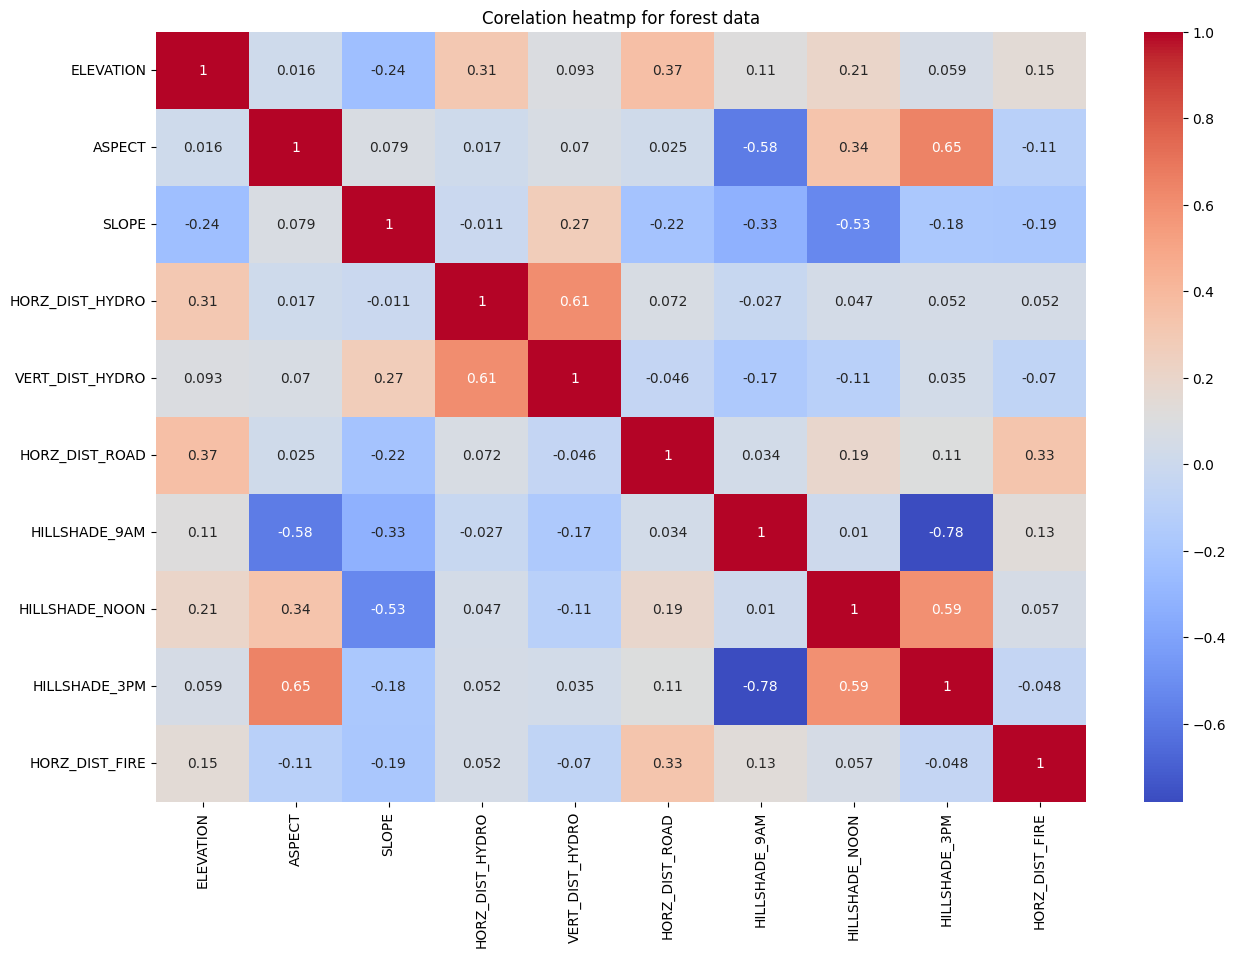

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.heatmap(cont_val, annot  = True, cmap = "coolwarm")
plt.title("Corelation heatmp for forest data")
plt.show()


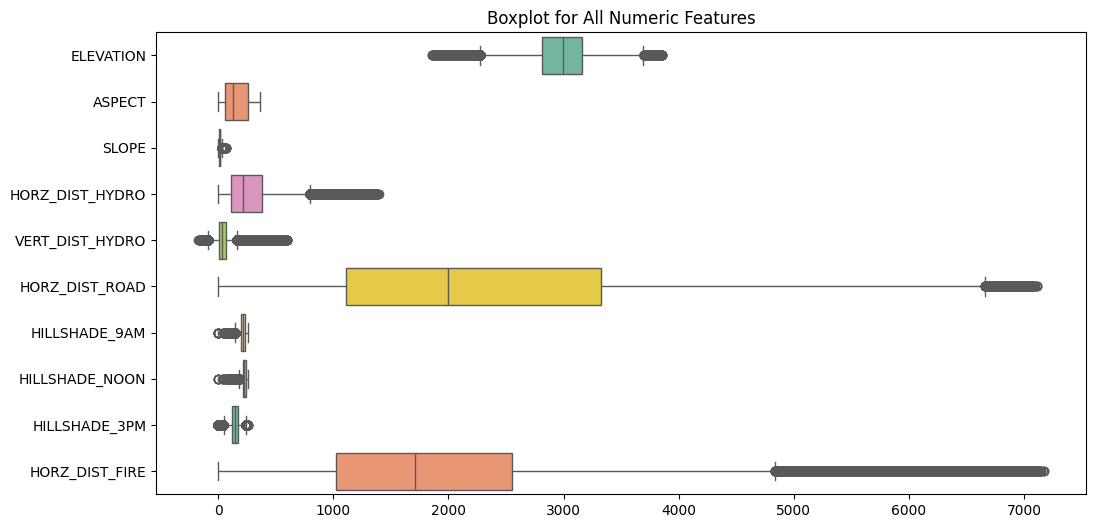

In [11]:
cont_val = df[cont_col]

plt.figure(figsize=(12, 6))
sns.boxplot(data=cont_val, orient='h', palette='Set2')
plt.title("Boxplot for All Numeric Features")
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   ELEVATION         581012 non-null  int64
 1   ASPECT            581012 non-null  int64
 2   SLOPE             581012 non-null  int64
 3   HORZ_DIST_HYDRO   581012 non-null  int64
 4   VERT_DIST_HYDRO   581012 non-null  int64
 5   HORZ_DIST_ROAD    581012 non-null  int64
 6   HILLSHADE_9AM     581012 non-null  int64
 7   HILLSHADE_NOON    581012 non-null  int64
 8   HILLSHADE_3PM     581012 non-null  int64
 9   HORZ_DIST_FIRE    581012 non-null  int64
 10  WILDERNESS_AREA1  581012 non-null  int64
 11  WILDERNESS_AREA2  581012 non-null  int64
 12  WILDERNESS_AREA3  581012 non-null  int64
 13  WILDERNESS_AREA4  581012 non-null  int64
 14  SOIL_TYPE1        581012 non-null  int64
 15  SOIL_TYPE2        581012 non-null  int64
 16  SOIL_TYPE3        581012 non-null  int64
 17  SOIL_TYPE4

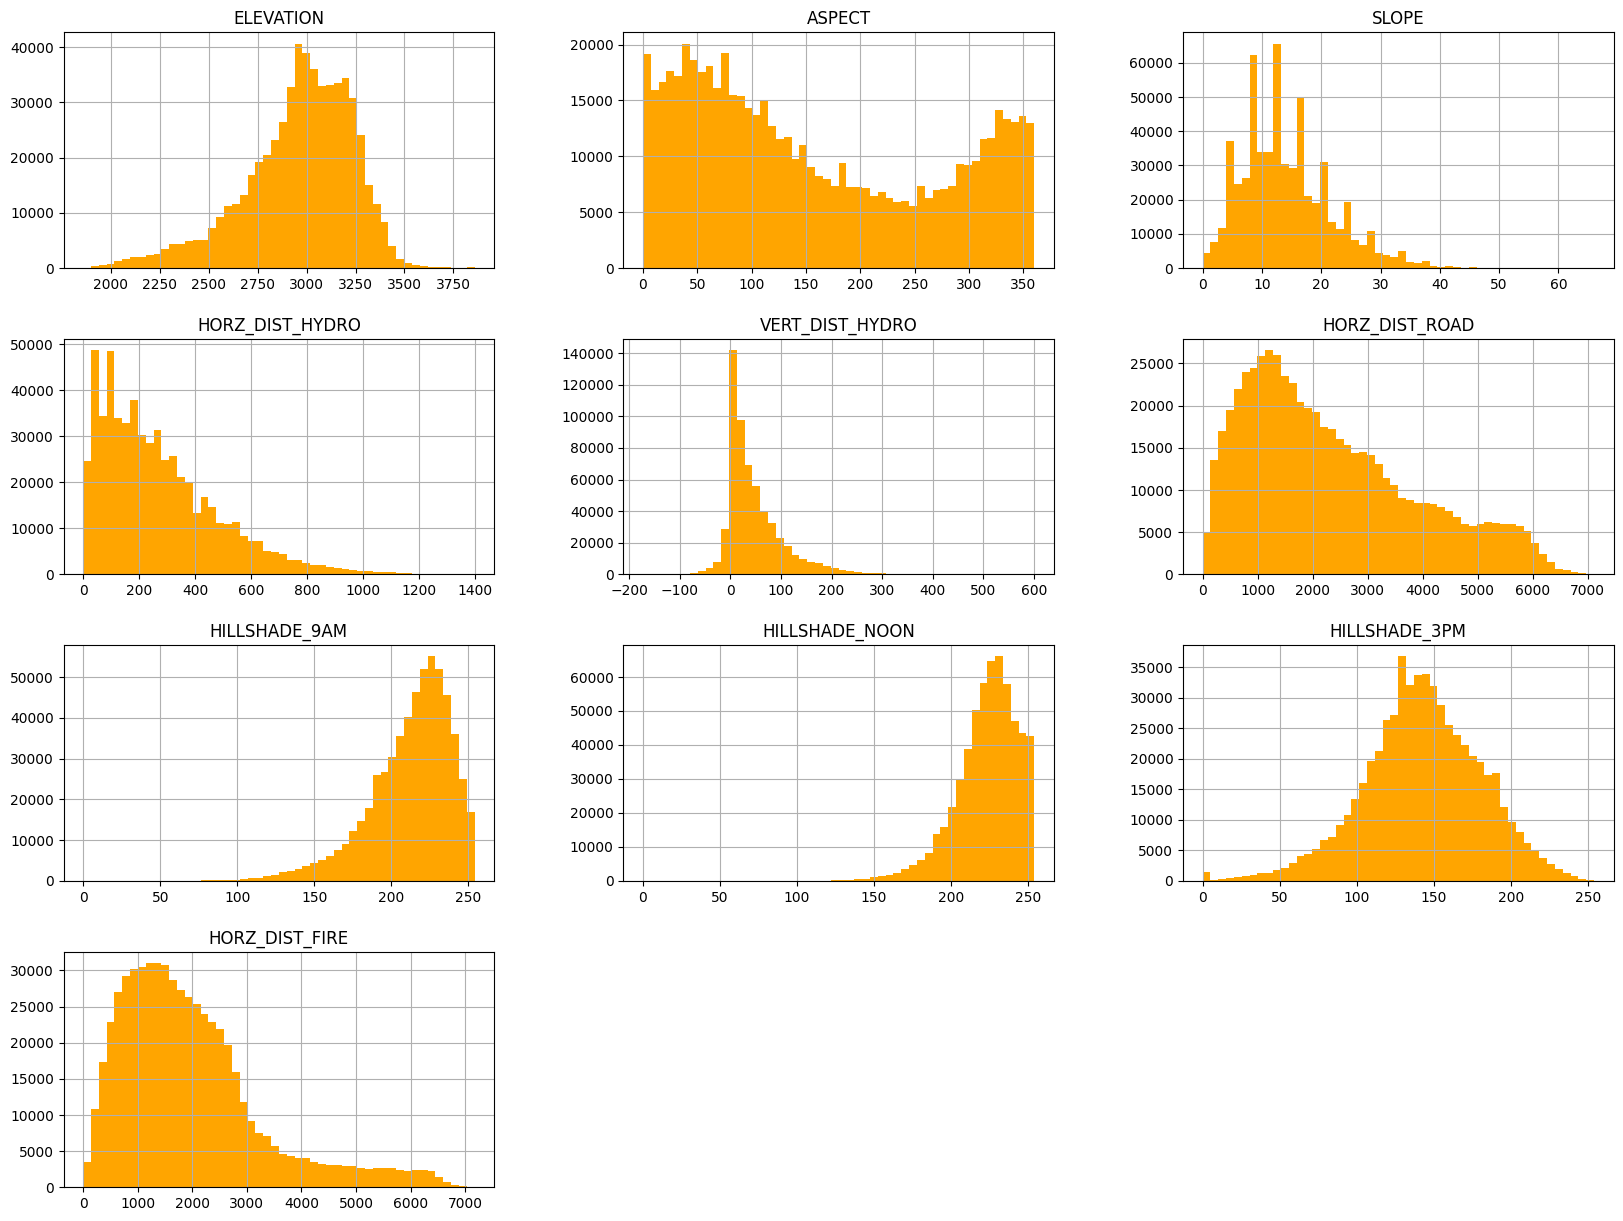

In [13]:
import matplotlib.pyplot as plt 

cont_val.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['COVER_TYPE'], axis=1)
y = df['COVER_TYPE']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(464809, 54)
(116203, 54)
(464809,)
(116203,)


## Model Training

In [18]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier()
rm.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report

y_pred = rm.predict(X_test)

result = r2_score(y_test, y_pred)

print(result)

0.8874782479557596


In [20]:
result_2 = classification_report(y_test, y_pred)
print(result_2)

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.95      0.97      0.96      7121
           4       0.92      0.84      0.88       526
           5       0.95      0.77      0.85      1995
           6       0.94      0.91      0.92      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



In [21]:
X = df[columns[:-1]]   # all except COVER_TYPE
y = df["COVER_TYPE"]


In [22]:
import shap
model = rm
explainer = shap.TreeExplainer(model)
X_test_sample = X_test.sample(100, random_state=42)



In [23]:
shap_values = explainer.shap_values(X_test_sample, approximate=True)


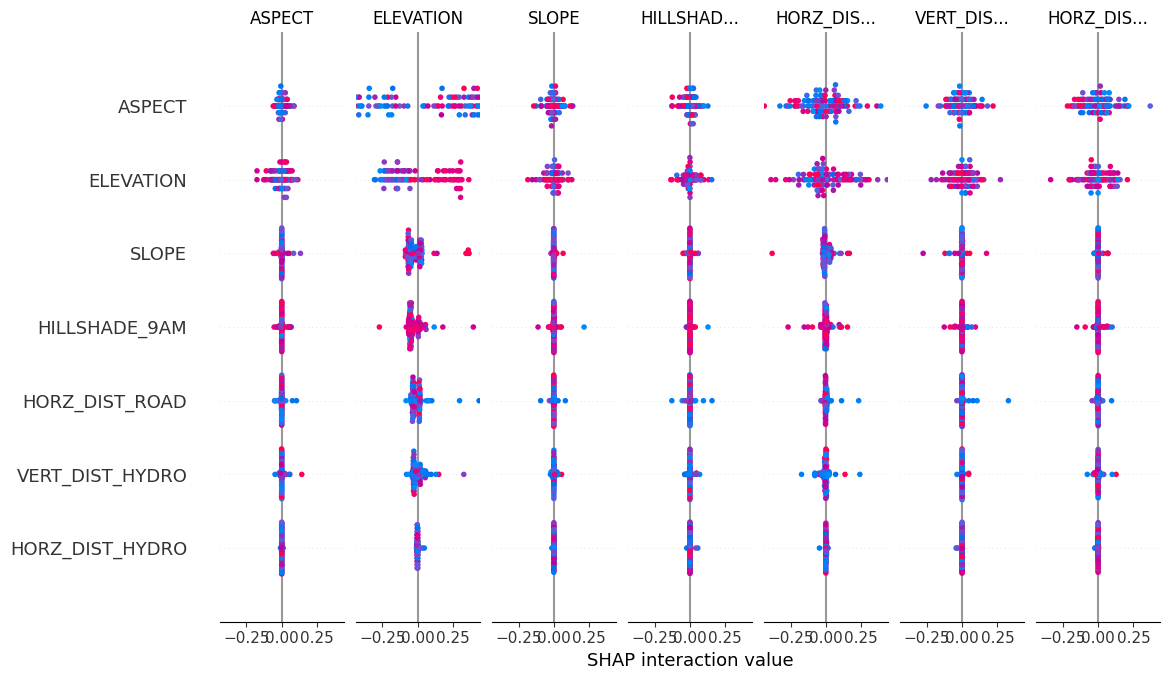

In [25]:
shap.summary_plot(shap_values, X_test_sample)